In [1]:
import os
import sys
sys.path.insert(0, "../")
import pandas as pd
import numpy as np
import data_processing.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Methodology

In [2]:
TEST_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data_processing/test_files/')
SAMPLE_BY_LOAN_FN = "sample_by_loan_amt.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 160)

In [3]:
cat_vars_of_interest = ["term", "grade", "sub_grade", "emp_title", "emp_length", "home_ownership", "verification_status", "purpose", "addr_state", 
    "initial_list_status", "application_type", "hardship_flag", "loan_status"
]
num_vars_of_interest = list(set([
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "issue_d", "annual_inc", "dti", "fico_range_low", "fico_range_high", 
    "revol_bal", "revol_util", "open_acc", "zip_code", "delinq_2yrs", "inq_last_6mths", "total_acc", "mths_since_last_delinq", "mths_since_last_record", "mths_since_rcnt_il",
    "last_credit_pull_d", "open_il_12m", "open_il_24m", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util",
    "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_sats", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "tot_hi_cred_lim", 
    "pct_tl_nvr_dlq", "percent_bc_gt_75", "total_bal_ex_mort", "total_bc_limit","total_il_high_credit_limit", "mths_since_last_major_derog", "mths_since_recent_bc",
    "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq"
]))

In [4]:
utils.cluster_create(["loan_amnt", "fico_range_high"], TEST_PATH + SAMPLE_BY_LOAN_FN, TEST_PATH + "sample_by_loan_amt_cleaned_clustered.csv", numeric_cols = num_vars_of_interest, categorical_cols =cat_vars_of_interest)

/home/acowlagi/.conda/envs/torch_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (19,59,118) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


NameError: name 'colNames' is not defined

In [47]:
from sklearn.cluster import KMeans
cleaned_clustered_df = pd.read_csv(TEST_PATH + "sample_by_loan_amt_cleaned_clustered.csv")

In [60]:
kmeans = KMeans(n_clusters=30).fit(cleaned_clustered_df[["fico_range_low"]])
cleaned_clustered_df['cluster'] = kmeans.labels_

<AxesSubplot:ylabel='Frequency'>

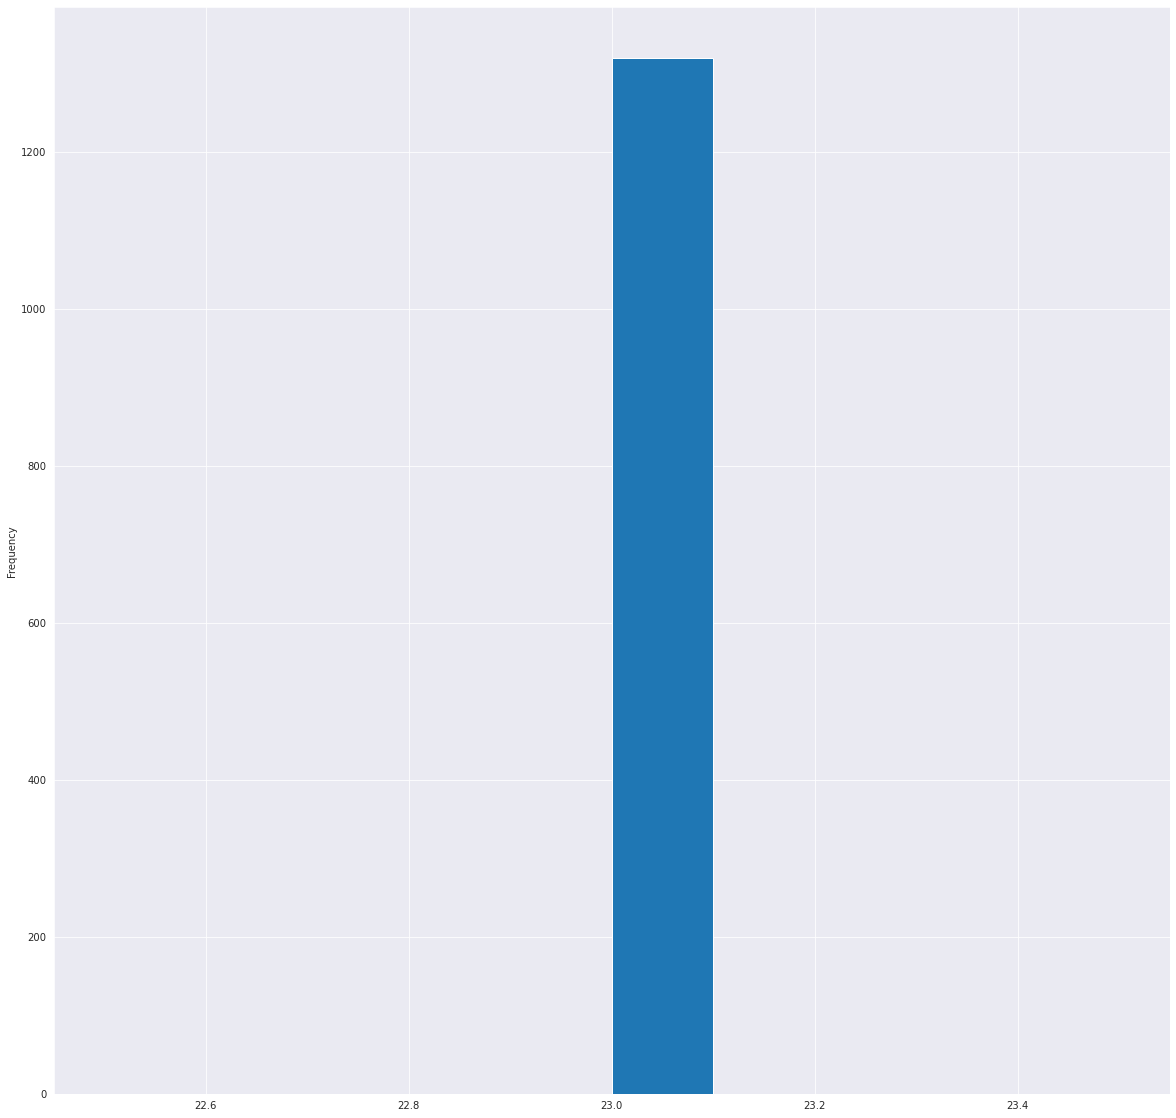

In [58]:
cleaned_clustered_df["cluster"][cleaned_clustered_df["grade_A"] == 1].plot(kind = "hist")